# In-Class Exercise 1: Monte Carlo Estimates of $\pi$

Using the template below as a guide, we will use stochastic techniques to develop an estimate of $\pi$ for data sets of various sizes (N=100, 1,000, and 10,000) using both a mathematical and graphical approach.

**Your tasks:**

  1. Complete the functions in the cells below based on the description of the mathematical and graphical approaches described below.
  2. Answer the questions under "Analysis and Questions"
  3. When finished, upload your notebook (or your group's notebook) to Canvas.

---

## Mathematical Approach:

In the mathematical approach, we use random numbers ($x$) to calculate corresponding values of $y$ on a unit circle ($x^2+y^2=1$). According to the mean value theorem, the average of these $y$ sample is equal to the integral under the curve, or $\frac{\pi}{4}$.

## Graphical Approach:

In the graphical approach, we use random numbers ($x$ and $y$) to determine if the point ($x,y$) is inside or outside of the unit circle. The value of $\frac{\pi}{4}$ is estimated by the ratio of the number of points within the unit circle to the total number of points sampled.

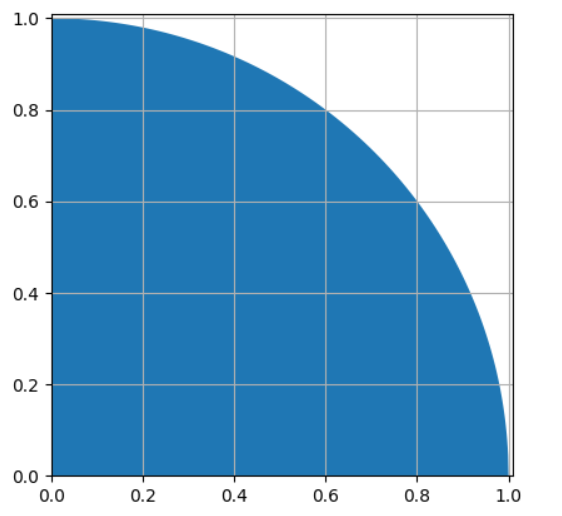

A set of functions is defined below to aid in this process. You'll need to complete these functions based on their descriptions in the cells below.

  - `mathematical`
  - `mathematical_run`
  - `graphical`
  - `graphical_run`


**Reminder: The standard error describes the dispersion of the mean (i.e., estimate of π) if the calculation were done multiple times. It is calculated using the sample standard deviation divided by the square root of the number of samples, N.**

There is also a section for plotting these results below that can be executed once these functions have been completed.

---

## Analysis and Questions:

The data in the "Questions" tab will be automatically populated with the "Summary" table for each method (10 estimates of π and corresponding standard deviations of the samples and standard errors for N=100; 1,000; and 10,000). Please answer the following questions in the spreadsheet you will upload for submission. 

1. How does N affect the standard deviation of the samples?

2. How close is the mean value to the correct value of π in each estimate?  What can this be attributed to?

3. Which approach (mathematical or graphical) has a lower standard deviation of the samples?  Why do you think this is so?




In [ ]:
import numpy as np

In [ ]:
n_samples = 10_000

In [ ]:
def mathematical(x):
    """
    Based on an input random number, return the value
    of the curve at the x position

    Parameters
    ----------
    x : float
        Sampled x position

    Returns
    -------
    float
        y value on the circle
    """
    return None

In [ ]:
def mathematical_run(N):
    # generate N random numbers between zero and one
    ys = np.random.random(N)
    # evaluate the mathematical function for each random number
    values = np.asarray([mathematical(x) for x in ys])


    ##### REPLACE "None" WITH APPROPRIATE CODE HERE #####
    # more than one line can be used if desired
    # compute the mean
    mean = sum(values) / N
    # compute the sample sandard deviation
    std_dev = None
    # compute the sample standard error
    std_err = None
    
    # adjust for problem symmetry
    std_err = 4*std_err
    pi_estimate = 4*mean
    print(f'Average of mathematical approach: {mean}')
    print(f'Std. Dev. of mathematical approach: {std_dev}')
    print(f'Standard Error of the mathematical approach: {std_err}')
    print(f'Estimated value of pi: {pi_estimate}')
    return pi_estimate, std_err

In [ ]:
mathematical_run(n_samples)

In [ ]:
def graphical(x, y):
    """
    Based on two input random numbers, return whether or not
    the value lies inside the circle

    Parameters
    ----------
    x : float
        Sampled x position
    y : float
        Sampled y position
    
    Returns
    -------
    bool 
        Whether or not the input point is inside or outside the circle
    """
    return None

In [ ]:
def graphical_run(N):
    # generate N random numbers between zero and one for x and y
    xs = np.random.random(N)
    ys = np.random.random(N)

    # evaluate the graphical function for each pair of x, y values
    values = np.asarray([graphical(x, y) for x, y in zip(xs, ys)]).astype(int)

    ##### REPLACE "None" WITH APPROPRIATE CODE HERE #####
    # more than one line can be used if desired
    mean = None
    # compute the sample sandard deviation
    std_dev = None
    # compute the sample standard error
    std_err = None

    # adjust for problem symmetry
    std_dev = 4*std_dev
    std_err = 4*std_err
    pi_estimate = 4*mean
    # no need to modify the lines below
    print(f'Average of mathematical approach: {mean}')
    print(f'Std. Dev. of mathematical approach: {std_dev}')
    print(f'Standard Error of the mathematical approach: {std_err}')
    print(f'Estimated value of pi: {pi_estimate}')
    return pi_estimate, std_err

In [ ]:
graphical_run(n_samples)

# Plotting

**If your implementations of the functions above are complete. The code below
should need no modifications.**

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
np.random.seed(100) # for reproducibility
samples = (1000, 10_000, 100_000, 1_000_000)
mathematical_estimates = []
mathematical_errors = []
graphical_estimates = []
graphical_errors = []
for s in samples:
    print(f'---- {s:.1e} samples -----')
    pi_est, err = mathematical_run(s)
    mathematical_estimates.append(pi_est)
    mathematical_errors.append(2*err)
    pi_est, err = mathematical_run(s)
    graphical_estimates.append(pi_est)
    graphical_errors.append(2*err)
    print('-----------------------')

plt.errorbar(samples, mathematical_estimates, yerr=mathematical_errors, elinewidth=2, label='Mathematical')
plt.errorbar(samples, graphical_estimates, yerr=graphical_errors, label='Graphical')
plt.xscale('log')
plt.axhline(np.pi, color='black')
plt.legend()